In [7]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

#read dataset
dataset= pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
#buat kolom baru(order_month)
dataset['order_month']=dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
#kolom baru (GMV)
dataset['gmv'] = dataset['item_price']*dataset['quantity']

print(dataset.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
3  BRAND_A         4      205000     2019-08   820000  
4  BRAND_R         2     4475000     2019-10  8950000  


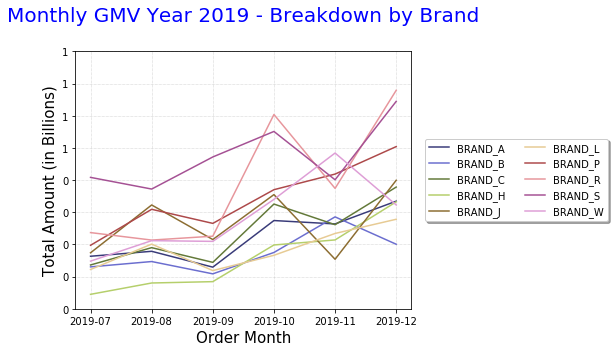

In [39]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

#read dataset
dataset= pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month']=dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
#kolom baru (GMV)
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat Multi-Line Chart
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot(cmap='tab20b')
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5),shadow=True, ncol=2)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

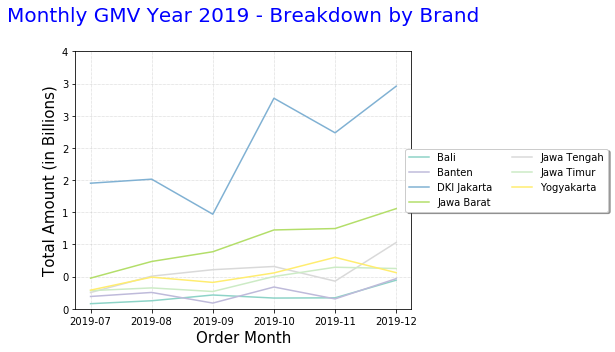

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt


#read dataset
dataset= pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month']=dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
#kolom baru (GMV)
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat Multi-Line Chart
plt.clf()
dataset.groupby(['order_month','province'])['gmv'].sum().unstack().plot(cmap='Set3')
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5),shadow=True, ncol=2)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


<Figure size 432x288 with 0 Axes>

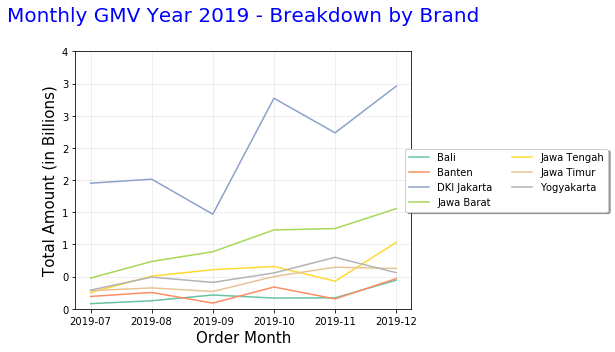

In [35]:
import datetime
import pandas as pd
import matplotlib.pyplot as pl

#read dataset
dataset= pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month']=dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
#kolom baru (GMV)
dataset['gmv'] = dataset['item_price']*dataset['quantity']

#buat top 5 province dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
				.sum()
				.reset_index()
				.sort_values(by='gmv',ascending=False)
				.head(5))
print(top_provinces)

#buat kolom baru untuk top_province di dataset
dataset['province_top'] = dataset['province'].apply

# Buat Multi-Line Chart
plt.clf()
dataset.groupby(['order_month','province'])['gmv'].sum().unstack().plot(cmap='Set2')
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5),shadow=True, ncol=2)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

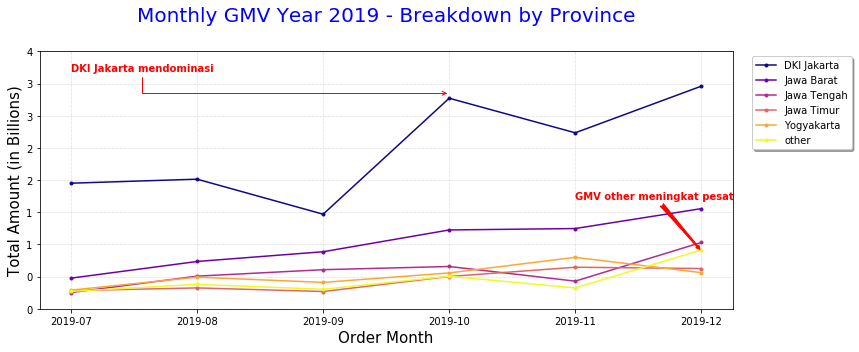

In [6]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv',ascending=False)
                        .head(5))
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000), 
			 xytext=(4, 1700000000), weight='bold', color='red',
			 arrowprops=dict(arrowstyle='fancy',
							 connectionstyle="arc3",
							 color='red'))
# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000),
			 xytext=(0, 3700000000), weight='bold', color='red',
			 arrowprops=dict(arrowstyle='->',
							 connectionstyle="angle",
							 color='red'))


plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

In [12]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4= dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month']>='2019-07')]
print(dataset_dki_q4.head())
print(dataset_dki_q4.tail())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
3  BRAND_A         4      205000     2019-08   820000  
4  BRAND_R         2     4475000     2019-10  8950000  
      order_id  order_date  customer_id             city     province  \
4990   1678408  2019-08-02        15182    Jakarta Pusat  DKI Jakarta   
4992   1734787  2019-12-18     

In [13]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

dataset_jawtim_q4= dataset[(dataset['province']=='Jawa Timur') & (dataset['order_month']>='2019-07')]
print(dataset_jawtim_q4.head())
print(dataset_jawtim_q4.tail())

    order_id  order_date  customer_id      city    province product_id  \
16   1668715  2019-07-04        13397  Surabaya  Jawa Timur      P1902   
31   1710385  2019-11-01        13689    Malang  Jawa Timur      P1900   
45   1705150  2019-10-22        13514  Surabaya  Jawa Timur      P4075   
54   1700752  2019-10-10        18259    Malang  Jawa Timur      P0232   
78   1707676  2019-10-27        16930    Malang  Jawa Timur      P0735   

      brand  quantity  item_price order_month       gmv  
16  BRAND_J        10      740000     2019-07   7400000  
31  BRAND_J       100      639000     2019-11  63900000  
45  BRAND_W        12     1045000     2019-10  12540000  
54  BRAND_A        12      450000     2019-10   5400000  
78  BRAND_C        10      310000     2019-10   3100000  
      order_id  order_date  customer_id    city    province product_id  \
4913   1687621  2019-08-30        17400  Malang  Jawa Timur      P4017   
4917   1679494  2019-08-07        14709  Malang  Jawa Timur

In [14]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

dataset_jawbar_q4= dataset[(dataset['province']=='Jawa Barat') & (dataset['order_month']>='2019-07')]
print(dataset_jawbar_q4.head())
print(dataset_jawbar_q4.tail())

    order_id  order_date  customer_id     city    province product_id  \
19   1731961  2019-12-13        13880    Bogor  Jawa Barat      P2853   
21   1709671  2019-10-31        14738  Bandung  Jawa Barat      P4080   
24   1698916  2019-10-07        14110    Bogor  Jawa Barat      P0817   
26   1702162  2019-10-15        17450    Bogor  Jawa Barat      P3958   
27   1721629  2019-11-26        16360  Bandung  Jawa Barat      P1879   

      brand  quantity  item_price order_month       gmv  
19  BRAND_R         6      740000     2019-12   4440000  
21  BRAND_W        24      113000     2019-10   2712000  
24  BRAND_C        12      520000     2019-10   6240000  
26  BRAND_W        96      607000     2019-10  58272000  
27  BRAND_J         1      219000     2019-11    219000  
      order_id  order_date  customer_id    city    province product_id  \
4979   1734193  2019-12-17        13238   Depok  Jawa Barat      P1891   
4980   1674277  2019-07-21        14808   Bogor  Jawa Barat      

In [2]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

dataset_jawteng_q4= dataset[(dataset['province']=='Jawa Tengah') & (dataset['order_month']>='2019-07')]
print(dataset_jawteng_q4.head())
print(dataset_jawteng_q4.tail())

    order_id  order_date  customer_id       city     province product_id  \
7    1695367  2019-09-26        13069  Surakarta  Jawa Tengah      P3342   
17   1714324  2019-11-11        14096  Surakarta  Jawa Tengah      P2022   
51   1726822  2019-12-05        14096  Surakarta  Jawa Tengah      P0790   
55   1705618  2019-10-22        13016  Surakarta  Jawa Tengah      P0303   
86   1712479  2019-11-06        16753  Surakarta  Jawa Tengah      P0156   

      brand  quantity  item_price order_month      gmv  
7   BRAND_S         2      205000     2019-09   410000  
17  BRAND_L         1     1748000     2019-11  1748000  
51  BRAND_C         1     1164000     2019-12  1164000  
55  BRAND_B         6     1045000     2019-10  6270000  
86  BRAND_A         1     2095000     2019-11  2095000  
      order_id  order_date  customer_id        city     province product_id  \
4937   1668907  2019-07-05        15267  Purwokerto  Jawa Tengah      P2950   
4948   1681786  2019-08-13        16656  Pu

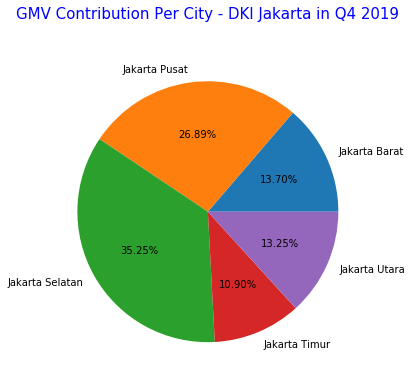

In [16]:
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels=gmv_per_city_dki_q4['city'], autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.show()

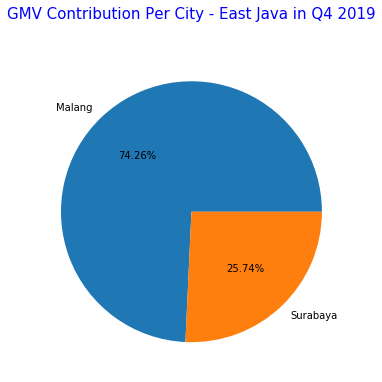

In [18]:
gmv_per_city_jawtim_q4 = dataset_jawtim_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_jawtim_q4['gmv'], labels=gmv_per_city_jawtim_q4['city'], autopct='%1.2f%%')
plt.title('GMV Contribution Per City - East Java in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.show()

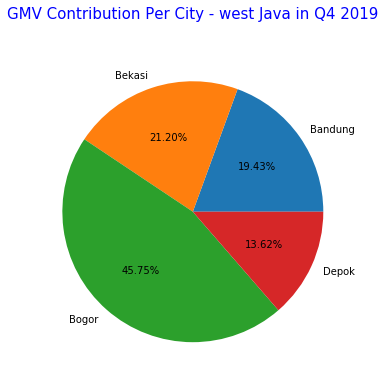

In [19]:
gmv_per_city_jawbar_q4 = dataset_jawbar_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_jawbar_q4['gmv'], labels=gmv_per_city_jawbar_q4['city'], autopct='%1.2f%%')
plt.title('GMV Contribution Per City - west Java in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.show()

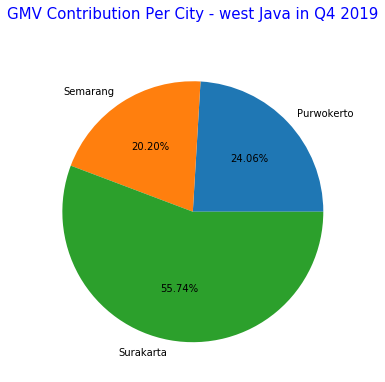

In [20]:
gmv_per_city_jawteng_q4 = dataset_jawteng_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_jawteng_q4['gmv'], labels=gmv_per_city_jawteng_q4['city'], autopct='%1.2f%%')
plt.title('GMV Contribution Per City - west Java in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.show()

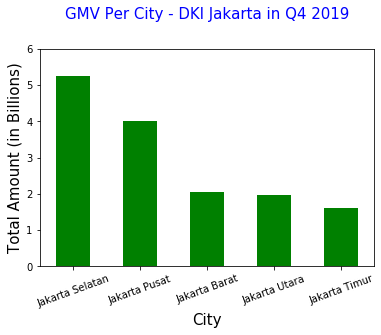

In [28]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-07')]

plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019', loc='center', pad= 30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=20)
plt.show()

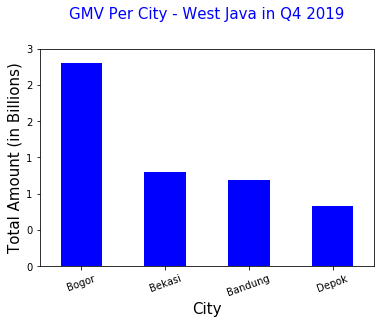

In [3]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jawbar_q4 = dataset[(dataset['province']=='Jawa Barat') & (dataset['order_month'] >= '2019-07')]

plt.clf()
dataset_jawbar_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('GMV Per City - West Java in Q4 2019', loc='center', pad= 30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=20)
plt.show()

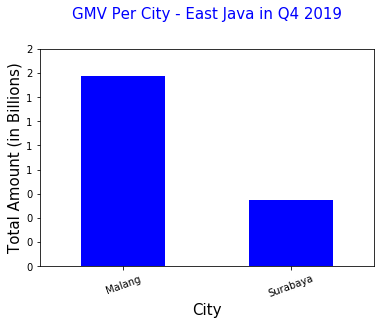

In [4]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jawtim_q4 = dataset[(dataset['province']=='Jawa Timur') & (dataset['order_month'] >= '2019-07')]

plt.clf()
dataset_jawtim_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('GMV Per City - East Java in Q4 2019', loc='center', pad= 30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=20)
plt.show()

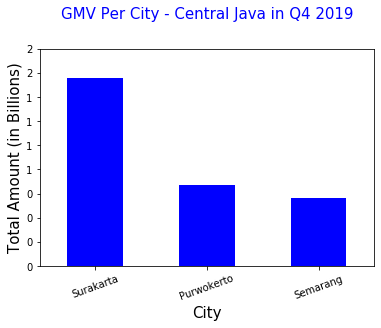

In [5]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jawteng_q4 = dataset[(dataset['province']=='Jawa Tengah') & (dataset['order_month'] >= '2019-07')]

plt.clf()
dataset_jawteng_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('GMV Per City - Central Java in Q4 2019', loc='center', pad= 30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=20)
plt.show()

<Figure size 432x288 with 0 Axes>

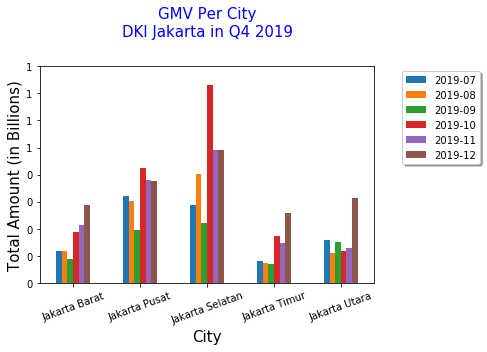

In [9]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-07')]

plt.clf()
dataset_dki_q4.groupby(['city', 'order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City\nDKI Jakarta in Q4 2019', loc='center', pad= 30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1)
plt.xticks(rotation=20)
plt.show()

<Figure size 432x288 with 0 Axes>

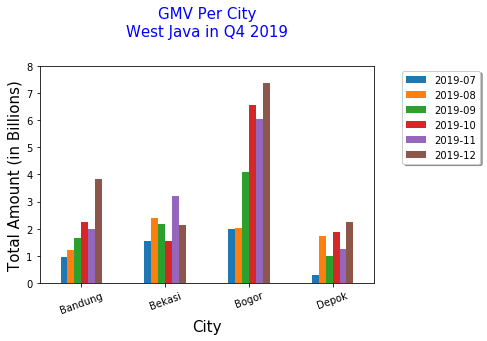

In [50]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jwb_q4 = dataset[(dataset['province']=='Jawa Barat') & (dataset['order_month'] >= '2019-07')]

plt.clf()
dataset_jwb_q4.groupby(['city', 'order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City\nWest Java in Q4 2019', loc='center', pad= 30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1)
plt.xticks(rotation=20)
plt.show()

<Figure size 432x288 with 0 Axes>

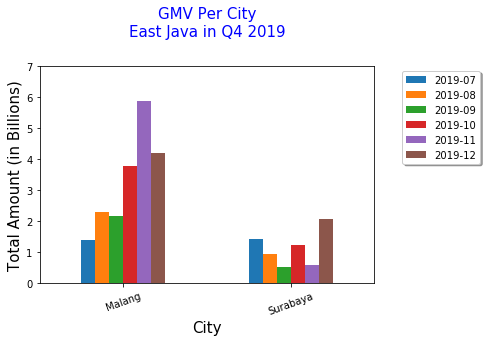

In [11]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jwtim_q4 = dataset[(dataset['province']=='Jawa Timur') & (dataset['order_month'] >= '2019-07')]

plt.clf()
dataset_jwtim_q4.groupby(['city', 'order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City\nEast Java in Q4 2019', loc='center', pad= 30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1)
plt.xticks(rotation=20)
plt.show()

<Figure size 432x288 with 0 Axes>

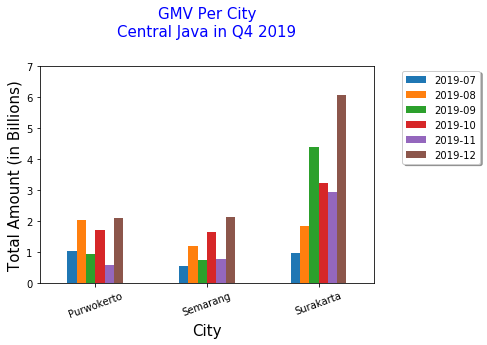

In [14]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jwteng_q4 = dataset[(dataset['province']=='Jawa Tengah') & (dataset['order_month'] >= '2019-07')]

plt.clf()
dataset_jwteng_q4.groupby(['city', 'order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City\nCentral Java in Q4 2019', loc='center', pad= 30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1)
plt.xticks(rotation=20)
plt.show()

<Figure size 432x288 with 0 Axes>

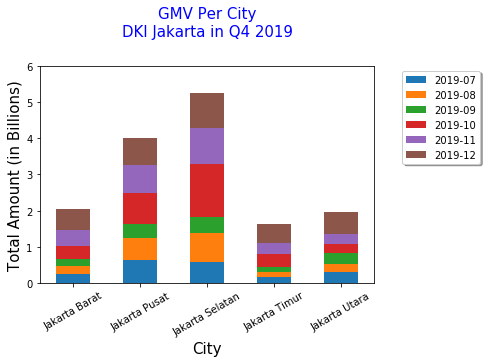

In [19]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-07')]

plt.clf()
dataset_dki_q4.groupby(['city', 'order_month'])['gmv'].sum().unstack().plot(kind='bar', stacked=True)
plt.title('GMV Per City\nDKI Jakarta in Q4 2019', loc='center', pad= 30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1)
plt.xticks(rotation=30)
plt.show()

<Figure size 432x288 with 0 Axes>

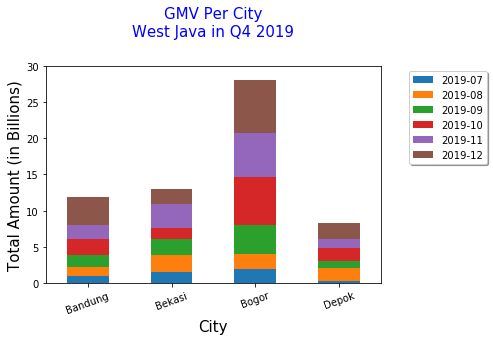

In [16]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jwb_q4 = dataset[(dataset['province']=='Jawa Barat') & (dataset['order_month'] >= '2019-07')]

plt.clf()
dataset_jwb_q4.groupby(['city', 'order_month'])['gmv'].sum().unstack().plot(kind='bar', stacked=True)
plt.title('GMV Per City\nWest Java in Q4 2019', loc='center', pad= 30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1)
plt.xticks(rotation=20)
plt.show()

<Figure size 432x288 with 0 Axes>

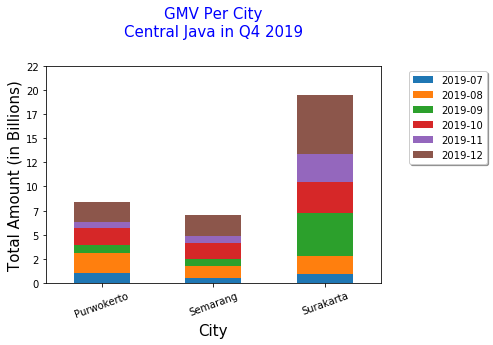

In [17]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jwteng_q4 = dataset[(dataset['province']=='Jawa Tengah') & (dataset['order_month'] >= '2019-07')]

plt.clf()
dataset_jwteng_q4.groupby(['city', 'order_month'])['gmv'].sum().unstack().plot(kind='bar', stacked=True)
plt.title('GMV Per City\nCentral Java in Q4 2019', loc='center', pad= 30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1)
plt.xticks(rotation=20)
plt.show()

<Figure size 432x288 with 0 Axes>

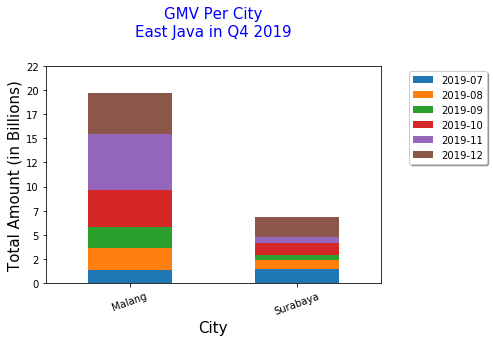

In [18]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jwtim_q4 = dataset[(dataset['province']=='Jawa Timur') & (dataset['order_month'] >= '2019-07')]

plt.clf()
dataset_jwtim_q4.groupby(['city', 'order_month'])['gmv'].sum().unstack().plot(kind='bar', stacked=True)
plt.title('GMV Per City\nEast Java in Q4 2019', loc='center', pad= 30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1)
plt.xticks(rotation=20)
plt.show()

In [30]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-07')]

data_per_customer =(dataset_dki_q4.groupby('customer_id')
                    .agg({'order_id':'nunique', 
                        'quantity': 'sum', 
                        'gmv':'sum'})
                   .reset_index()
                   .rename(columns={'order_id':'orders'}))

print(data_per_customer.sort_values(by='orders',ascending=False).head())

     customer_id  orders  quantity        gmv
841        17841      50       420  239445000
0          12748      41       637  210865000
276        14606      23        53   34004000
33         13089      15       336  173586000
876        18118       9        42   33730000


In [29]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jwt_q4 = dataset[(dataset['province']=='Jawa Timur') & (dataset['order_month'] >= '2019-07')]

data_per_customer =(dataset_jwt_q4.groupby('customer_id')
                    .agg({'order_id':'nunique', 
                        'quantity': 'sum', 
                        'gmv':'sum'})
                   .reset_index()
                   .rename(columns={'order_id':'orders'}))

print(data_per_customer.sort_values(by='orders',ascending=False).head())

     customer_id  orders  quantity       gmv
139        17811       7        31  18905000
90         15993       6        87  45467000
12         13137       6        36  22841000
135        17735       5       118  73404000
50         14367       5        56  44452000


In [28]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jwb_q4 = dataset[(dataset['province']=='Jawa Barat') & (dataset['order_month'] >= '2019-07')]

data_per_customer =(dataset_jwb_q4.groupby('customer_id')
                    .agg({'order_id':'nunique', 
                        'quantity': 'sum', 
                        'gmv':'sum'})
                   .reset_index()
                   .rename(columns={'order_id':'orders'}))

print(data_per_customer.sort_values(by='orders',ascending=False).head())

     customer_id  orders  quantity       gmv
146        15311      11       131  84396000
106        14527       9        28  32094000
85         14056       9        65  40517000
254        17509       8       118  65936000
157        15547       7        30  31261000


In [27]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jwteng_q4 = dataset[(dataset['province']=='Jawa Tengah') & (dataset['order_month'] >= '2019-07')]

data_per_customer =(dataset_jwteng_q4.groupby('customer_id')
                    .agg({'order_id':'nunique', 
                        'quantity': 'sum', 
                        'gmv':'sum'})
                   .reset_index()
                   .rename(columns={'order_id':'orders'}))

print(data_per_customer.sort_values(by='orders',ascending=False).head())

     customer_id  orders  quantity        gmv
35         14096      14       358  411184000
37         14194      10       119   87869000
125        17581       7       203  127215000
24         13694       7       636  348360000
120        17346       6        42   22260000


     customer_id  orders  quantity        gmv
841        17841      50       420  239445000
0          12748      41       637  210865000
276        14606      23        53   34004000
33         13089      15       336  173586000
876        18118       9        42   33730000


<Figure size 432x288 with 0 Axes>

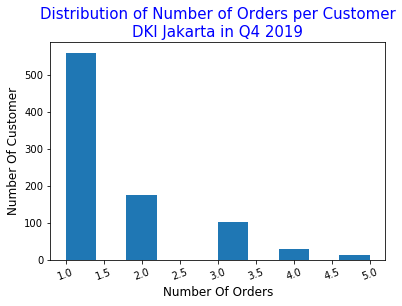

In [41]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-07')]

data_per_customer =(dataset_dki_q4.groupby('customer_id')
                    .agg({'order_id':'nunique', 
                        'quantity': 'sum', 
                        'gmv':'sum'})
                   .reset_index()
                   .rename(columns={'order_id':'orders'}))

print(data_per_customer.sort_values(by='orders',ascending=False).head())

#histogram graph
plt.clf()
plt.figure()
plt.hist(data_per_customer['orders'],range=(1,5))
plt.title('Distribution of Number of Orders per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Number Of Orders', fontsize=12)
plt.ylabel('Number Of Customer', fontsize=12)
plt.xticks(rotation=20)
plt.show()

     customer_id  orders  quantity       gmv
146        15311      11       131  84396000
106        14527       9        28  32094000
85         14056       9        65  40517000
254        17509       8       118  65936000
157        15547       7        30  31261000


<Figure size 432x288 with 0 Axes>

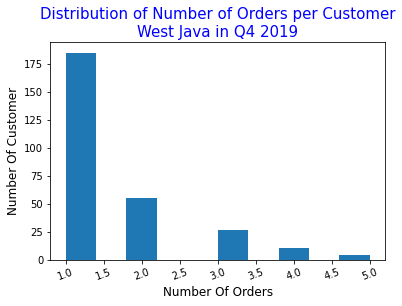

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jwb_q4 = dataset[(dataset['province']=='Jawa Barat') & (dataset['order_month'] >= '2019-07')]

data_per_customer =(dataset_jwb_q4.groupby('customer_id')
                    .agg({'order_id':'nunique', 
                        'quantity': 'sum', 
                        'gmv':'sum'})
                   .reset_index()
                   .rename(columns={'order_id':'orders'}))

print(data_per_customer.sort_values(by='orders',ascending=False).head())

#hist graph
plt.clf()
plt.figure()
plt.hist(data_per_customer['orders'],range=(1,5))
plt.title('Distribution of Number of Orders per Customer\nWest Java in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Number Of Orders', fontsize=12)
plt.ylabel('Number Of Customer', fontsize=12)
plt.xticks(rotation=20)
plt.show()

     customer_id  orders  quantity       gmv
139        17811       7        31  18905000
90         15993       6        87  45467000
12         13137       6        36  22841000
135        17735       5       118  73404000
50         14367       5        56  44452000


<Figure size 432x288 with 0 Axes>

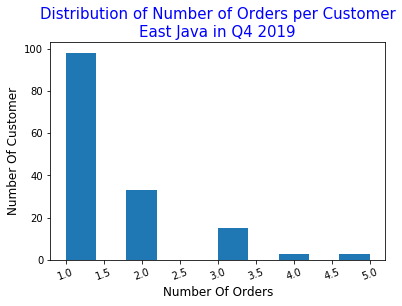

In [43]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jwt_q4 = dataset[(dataset['province']=='Jawa Timur') & (dataset['order_month'] >= '2019-07')]

data_per_customer =(dataset_jwt_q4.groupby('customer_id')
                    .agg({'order_id':'nunique', 
                        'quantity': 'sum', 
                        'gmv':'sum'})
                   .reset_index()
                   .rename(columns={'order_id':'orders'}))

print(data_per_customer.sort_values(by='orders',ascending=False).head())

#hist graph
plt.clf()
plt.figure()
plt.hist(data_per_customer['orders'],range=(1,5))
plt.title('Distribution of Number of Orders per Customer\nEast Java in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Number Of Orders', fontsize=12)
plt.ylabel('Number Of Customer', fontsize=12)
plt.xticks(rotation=20)
plt.show()

     customer_id  orders  quantity        gmv
35         14096      14       358  411184000
37         14194      10       119   87869000
125        17581       7       203  127215000
24         13694       7       636  348360000
120        17346       6        42   22260000


<Figure size 432x288 with 0 Axes>

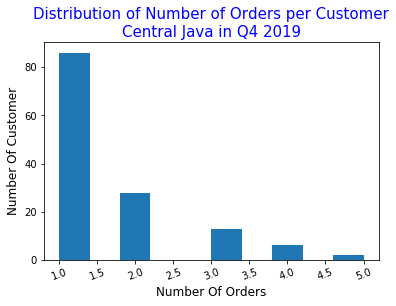

In [44]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jwteng_q4 = dataset[(dataset['province']=='Jawa Tengah') & (dataset['order_month'] >= '2019-07')]

data_per_customer =(dataset_jwteng_q4.groupby('customer_id')
                    .agg({'order_id':'nunique', 
                        'quantity': 'sum', 
                        'gmv':'sum'})
                   .reset_index()
                   .rename(columns={'order_id':'orders'}))

print(data_per_customer.sort_values(by='orders',ascending=False).head())

#hist graph
plt.clf()
plt.figure()
plt.hist(data_per_customer['orders'],range=(1,5))
plt.title('Distribution of Number of Orders per Customer\nCentral Java in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Number Of Orders', fontsize=12)
plt.ylabel('Number Of Customer', fontsize=12)
plt.xticks(rotation=20)
plt.show()

     customer_id  orders  quantity        gmv
0          12748      29       557  175286000
662        17841      26       270  144788000
207        14606      13        25   20714000
25         13089       8       166   93554000
462        16549       8        29   22714000
..           ...     ...       ...        ...
294        15154       1         4    2689000
291        15148       1        12    5400000
289        15121       1         8    2424000
288        15117       1         1    3494000
384        15975       1        42   25410000

[711 rows x 4 columns]


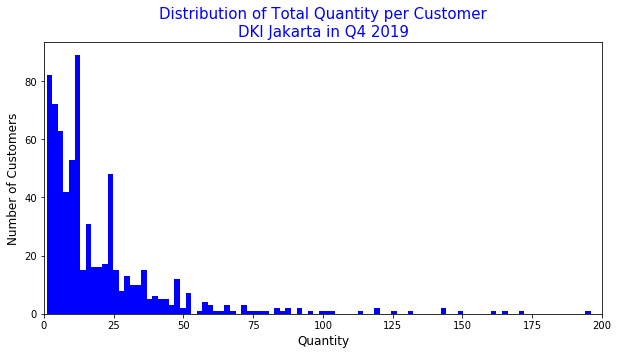

In [5]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer =(dataset_dki_q4.groupby('customer_id')
                    .agg({'order_id':'nunique', 
                        'quantity': 'sum', 
                        'gmv':'sum'})
                   .reset_index()
                   .rename(columns={'order_id':'orders'}))

print(data_per_customer.sort_values(by='orders',ascending=False))

#hist ver 2
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1,200), color='blue')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize= 12)
plt.ylabel('Number of Customers', fontsize= 12)
plt.xlim(xmin=0, xmax=200)
plt.show()

     customer_id  orders  quantity       gmv
194        17509       8       118  65936000
119        15547       6        29  30514000
148        16360       6        32  23924000
109        15311       6        22  11371000
170        16910       5        18   8559000
..           ...     ...       ...       ...
90         14898       1         3   3975000
92         14944       1         6   6270000
94         14960       1         4   2360000
97         15046       1        36  16200000
227        18251       1       432  53568000

[228 rows x 4 columns]


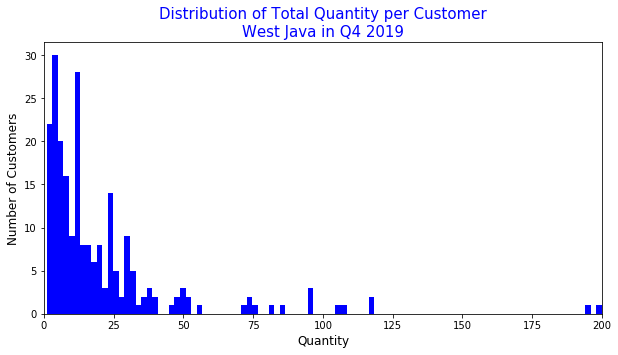

In [6]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jwb_q4 = dataset[(dataset['province']=='Jawa Barat') & (dataset['order_month'] >= '2019-10')]

data_per_customer =(dataset_jwb_q4.groupby('customer_id')
                    .agg({'order_id':'nunique', 
                        'quantity': 'sum', 
                        'gmv':'sum'})
                   .reset_index()
                   .rename(columns={'order_id':'orders'}))

print(data_per_customer.sort_values(by='orders',ascending=False))

#hist ver 2
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1,200), color='blue')
plt.title('Distribution of Total Quantity per Customer\nWest Java in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize= 12)
plt.ylabel('Number of Customers', fontsize= 12)
plt.xlim(xmin=0, xmax=200)
plt.show()

     customer_id  orders  quantity       gmv
107        17811       7        31  18905000
69         15993       6        87  45467000
8          13137       4        28  19689000
93         17218       3        20  16732000
40         14684       3        17   6460000
..           ...     ...       ...       ...
47         14968       1         2    298000
46         14895       1         6   6900000
45         14893       1        24  17844000
44         14862       1        10   5900000
119        18287       1        60  13164000

[120 rows x 4 columns]


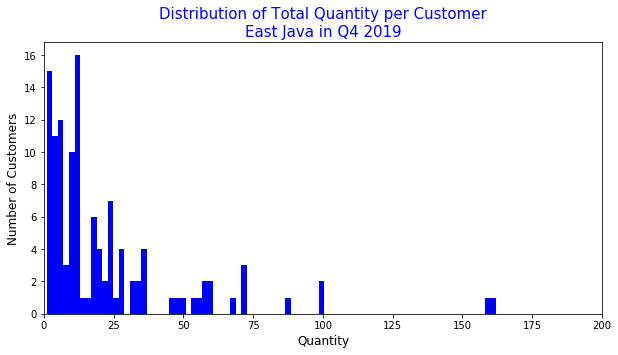

In [10]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jwtim_q4 = dataset[(dataset['province']=='Jawa Timur') & (dataset['order_month'] >= '2019-10')]

data_per_customer =(dataset_jwtim_q4.groupby('customer_id')
                    .agg({'order_id':'nunique', 
                        'quantity': 'sum', 
                        'gmv':'sum'})
                   .reset_index()
                   .rename(columns={'order_id':'orders'}))

print(data_per_customer.sort_values(by='orders',ascending=False))

#hist ver 2
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1,200), color='blue')
plt.title('Distribution of Total Quantity per Customer\nEast Java in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize= 12)
plt.ylabel('Number of Customers', fontsize= 12)
plt.xlim(xmin=0, xmax=200)
plt.show()

     customer_id  orders  quantity       gmv
107        17811       7        31  18905000
69         15993       6        87  45467000
8          13137       4        28  19689000
93         17218       3        20  16732000
40         14684       3        17   6460000
..           ...     ...       ...       ...
47         14968       1         2    298000
46         14895       1         6   6900000
45         14893       1        24  17844000
44         14862       1        10   5900000
119        18287       1        60  13164000

[120 rows x 4 columns]


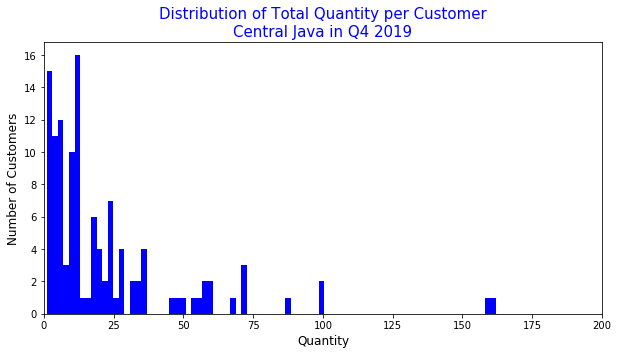

In [9]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jwteng_q4 = dataset[(dataset['province']=='Jawa Tengah') & (dataset['order_month'] >= '2019-10')]

data_per_customer =(dataset_jwtim_q4.groupby('customer_id')
                    .agg({'order_id':'nunique', 
                        'quantity': 'sum', 
                        'gmv':'sum'})
                   .reset_index()
                   .rename(columns={'order_id':'orders'}))

print(data_per_customer.sort_values(by='orders',ascending=False))

#hist ver 2
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1,200), color='blue')
plt.title('Distribution of Total Quantity per Customer\nCentral Java in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize= 12)
plt.ylabel('Number of Customers', fontsize= 12)
plt.xlim(xmin=0, xmax=200)
plt.show()

     customer_id  orders  quantity        gmv
0          12748      29       557  175286000
662        17841      26       270  144788000
207        14606      13        25   20714000
25         13089       8       166   93554000
462        16549       8        29   22714000
..           ...     ...       ...        ...
294        15154       1         4    2689000
291        15148       1        12    5400000
289        15121       1         8    2424000
288        15117       1         1    3494000
384        15975       1        42   25410000

[711 rows x 4 columns]


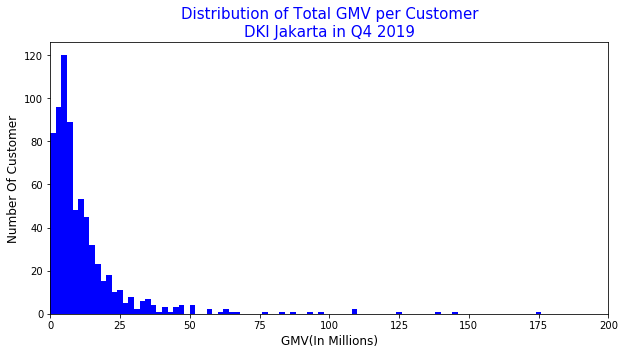

In [11]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer =(dataset_dki_q4.groupby('customer_id')
                    .agg({'order_id':'nunique', 
                        'quantity': 'sum', 
                        'gmv':'sum'})
                   .reset_index()
                   .rename(columns={'order_id':'orders'}))

print(data_per_customer.sort_values(by='orders',ascending=False))

plt.figure(figsize=(10,5))
plt.hist(data_per_customer['gmv'], bins=100, range=(1, 200000000), color= 'blue')
plt.title('Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('GMV(In Millions)', fontsize=12)
plt.ylabel('Number Of Customer', fontsize=12)
plt.xlim(xmin=0, xmax=200000000)
labels, locations=plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

     customer_id  orders  quantity        gmv
0          12748      29       557  175286000
662        17841      26       270  144788000
207        14606      13        25   20714000
25         13089       8       166   93554000
462        16549       8        29   22714000
..           ...     ...       ...        ...
294        15154       1         4    2689000
291        15148       1        12    5400000
289        15121       1         8    2424000
288        15117       1         1    3494000
384        15975       1        42   25410000

[711 rows x 4 columns]


<Figure size 432x288 with 0 Axes>

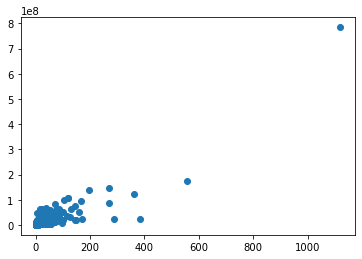

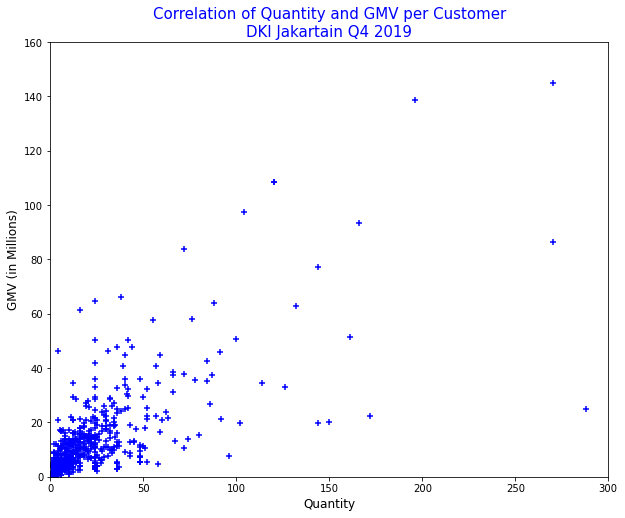

In [5]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer =(dataset_dki_q4.groupby('customer_id')
                    .agg({'order_id':'nunique', 
                        'quantity': 'sum', 
                        'gmv':'sum'})
                   .reset_index()
                   .rename(columns={'order_id':'orders'}))

print(data_per_customer.sort_values(by='orders',ascending=False))

#scatterplot 1
plt.clf()
plt.figure()
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'])
plt.show()

# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'], marker='+', color='blue')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakartain Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('GMV (in Millions)', fontsize=12)
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

     customer_id  orders  quantity       gmv
194        17509       8       118  65936000
119        15547       6        29  30514000
148        16360       6        32  23924000
109        15311       6        22  11371000
170        16910       5        18   8559000
..           ...     ...       ...       ...
90         14898       1         3   3975000
92         14944       1         6   6270000
94         14960       1         4   2360000
97         15046       1        36  16200000
227        18251       1       432  53568000

[228 rows x 4 columns]


<Figure size 432x288 with 0 Axes>

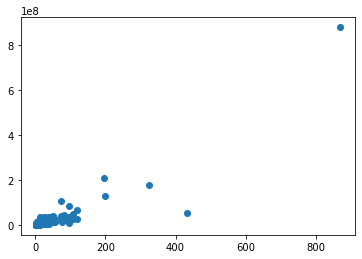

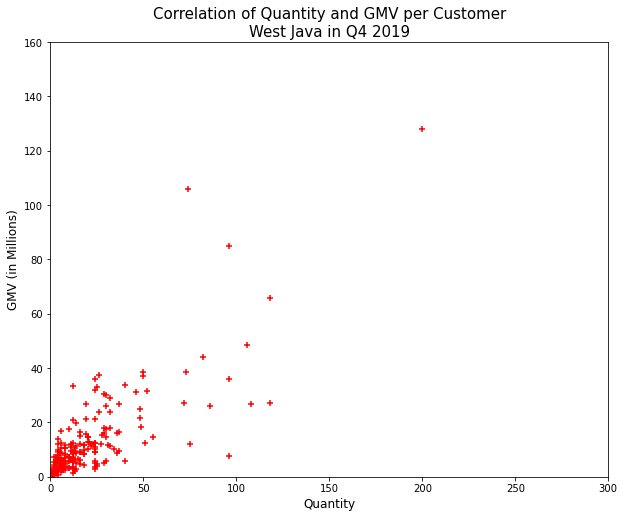

In [11]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jwb_q4 = dataset[(dataset['province']=='Jawa Barat') & (dataset['order_month'] >= '2019-10')]

data_per_customer =(dataset_jwb_q4.groupby('customer_id')
                    .agg({'order_id':'nunique',
                        'quantity': 'sum', 
                        'gmv':'sum'})
                   .reset_index()
                   .rename(columns={'order_id':'orders'}))

print(data_per_customer.sort_values(by='orders',ascending=False))

#scatterplot 1
plt.clf()
plt.figure()
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'])
plt.show()

# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Customer\nWest Java in Q4 2019', fontsize=15, color='black')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('GMV (in Millions)', fontsize=12)
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

     customer_id  orders  quantity       gmv
107        17811       7        31  18905000
69         15993       6        87  45467000
8          13137       4        28  19689000
93         17218       3        20  16732000
40         14684       3        17   6460000
..           ...     ...       ...       ...
47         14968       1         2    298000
46         14895       1         6   6900000
45         14893       1        24  17844000
44         14862       1        10   5900000
119        18287       1        60  13164000

[120 rows x 4 columns]


<Figure size 432x288 with 0 Axes>

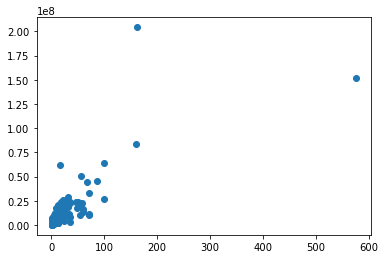

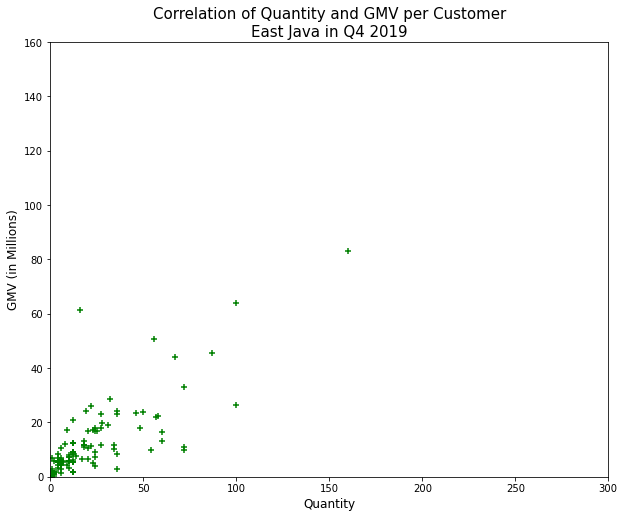

In [12]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jwtim_q4 = dataset[(dataset['province']=='Jawa Timur') & (dataset['order_month'] >= '2019-10')]

data_per_customer =(dataset_jwtim_q4.groupby('customer_id')
                    .agg({'order_id':'nunique',
                        'quantity': 'sum', 
                        'gmv':'sum'})
                   .reset_index()
                   .rename(columns={'order_id':'orders'}))

print(data_per_customer.sort_values(by='orders',ascending=False))

#scatterplot 1
plt.clf()
plt.figure()
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'])
plt.show()

# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'], marker='+', color='green')
plt.title('Correlation of Quantity and GMV per Customer\nEast Java in Q4 2019', fontsize=15, color='black')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('GMV (in Millions)', fontsize=12)
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

    customer_id  orders  quantity        gmv
30        14096      14       358  411184000
32        14194       7        95   68081000
0         12856       5        31   16066000
90        17346       5        40   21220000
95        17581       4       142   91760000
..          ...     ...       ...        ...
1         12920       1         2    2650000
24        13901       1         3    5760000
50        15567       1        12    8880000
49        15498       1        10   18570000
58        15769       1       130   83070000

[104 rows x 4 columns]


<Figure size 432x288 with 0 Axes>

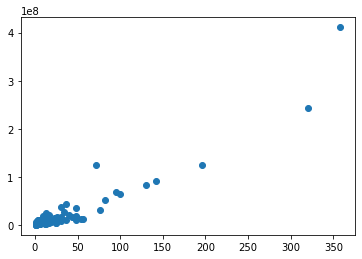

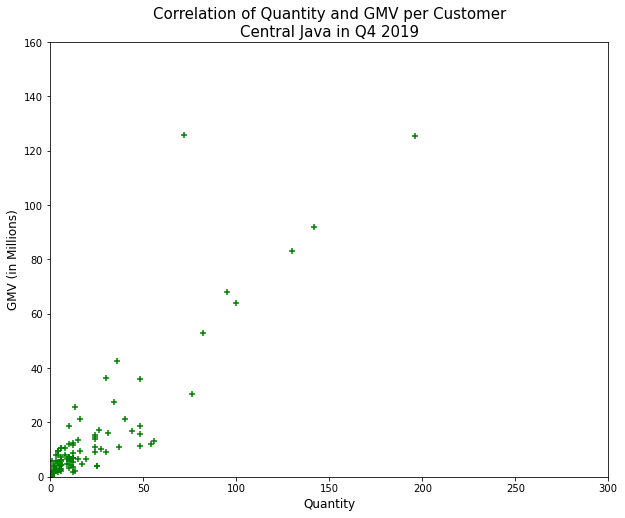

In [13]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_jwteng_q4 = dataset[(dataset['province']=='Jawa Tengah') & (dataset['order_month'] >= '2019-10')]

data_per_customer =(dataset_jwteng_q4.groupby('customer_id')
                    .agg({'order_id':'nunique',
                        'quantity': 'sum', 
                        'gmv':'sum'})
                   .reset_index()
                   .rename(columns={'order_id':'orders'}))

print(data_per_customer.sort_values(by='orders',ascending=False))

#scatterplot 1
plt.clf()
plt.figure()
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'])
plt.show()

# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'], marker='+', color='green')
plt.title('Correlation of Quantity and GMV per Customer\nCentral Java in Q4 2019', fontsize=15, color='black')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('GMV (in Millions)', fontsize=12)
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

In [30]:
#Mini project

import pandas as pd
import datetime 
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv']= dataset['item_price']*dataset['quantity']

#top 5 Brand
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
             .sum()
             .reset_index()
             .sort_values(by='quantity', ascending=False)
             .head(5))

top_province = (dataset[dataset['order_month']=='2019-12'].groupby('province')['quantity']
             .sum()
             .reset_index()
             .sort_values(by='quantity', ascending=False)
             .head(5))
top_gmv=(dataset[dataset['order_month']=='2019-12'].groupby('brand')['gmv']
             .sum()
             .reset_index()
             .sort_values(by='gmv', ascending=False)
             .head(5))

#dataframe Baru untuk Top 5 Brand
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]
print(top_brands)

dataset_top5province_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['province'].isin(top_province['province'].to_list()))]
print(top_province)

dataset_top5gmv_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_gmv['brand'].to_list()))]
print(top_gmv)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315
      province  quantity
2  DKI Jakarta      6157
3   Jawa Barat      2323
4  Jawa Tengah      1326
5   Jawa Timur      1136
6   Yogyakarta      1060
     brand         gmv
7  BRAND_R  1358124000
8  BRAND_S  1289261000
6  BRAND_P  1008256000
4  BRAND_J   798862000
2  BRAND_C   756636000


     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315
      province  quantity
2  DKI Jakarta      6157
3   Jawa Barat      2323
4  Jawa Tengah      1326
5   Jawa Timur      1136
6   Yogyakarta      1060
     brand         gmv
7  BRAND_R  1358124000
8  BRAND_S  1289261000
6  BRAND_P  1008256000
4  BRAND_J   798862000
2  BRAND_C   756636000


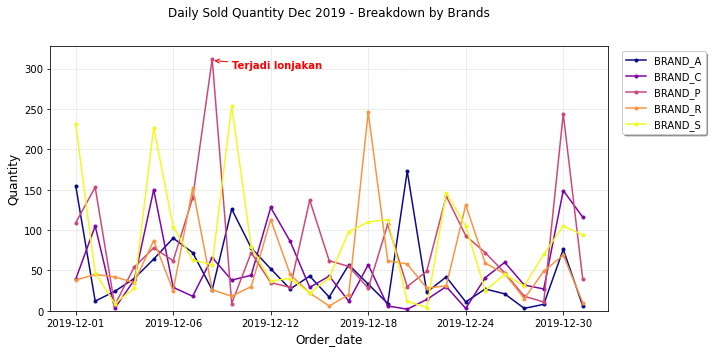

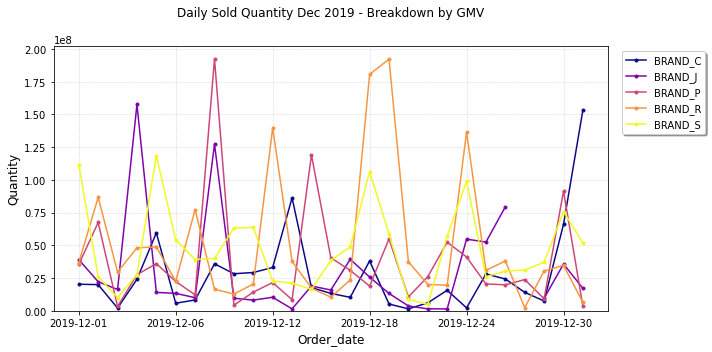

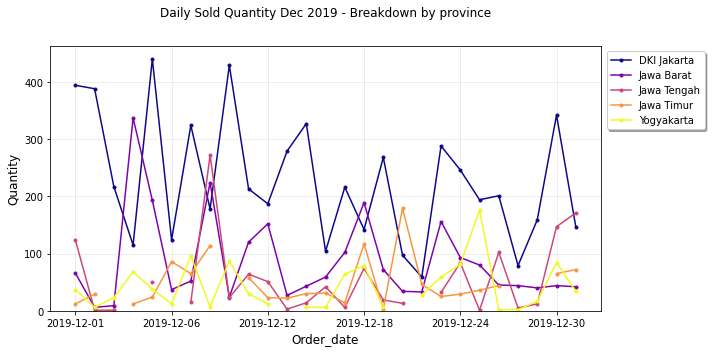

In [1]:
import pandas as pd
import datetime 
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv']= dataset['item_price']*dataset['quantity']

#top 5 Brand
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
             .sum()
             .reset_index()
             .sort_values(by='quantity', ascending=False)
             .head(5))

top_province = (dataset[dataset['order_month']=='2019-12'].groupby('province')['quantity']
             .sum()
             .reset_index()
             .sort_values(by='quantity', ascending=False)
             .head(5))
top_gmv=(dataset[dataset['order_month']=='2019-12'].groupby('brand')['gmv']
             .sum()
             .reset_index()
             .sort_values(by='gmv', ascending=False)
             .head(5))

#dataframe Baru untuk Top 5 Brand
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]
print(top_brands)

dataset_top5province_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['province'].isin(top_province['province'].to_list()))]
print(top_province)

dataset_top5gmv_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_gmv['brand'].to_list()))]
print(top_gmv)

#multi line graph visual

#multi line graph 
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')

plt.title('Daily Sold Quantity Dec 2019 - Breakdown by Brands', loc='center',pad=30, fontsize=12, color='black')
plt.xlabel('Order_date', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
weight='bold', color='red',
arrowprops=dict(arrowstyle='->',
connectionstyle="arc3",
color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

#multi line graph
dataset_top5gmv_dec.groupby(['order_date','brand'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')

plt.title('Daily Sold Quantity Dec 2019 - Breakdown by GMV', loc='center',pad=30, fontsize=12, color='black')
plt.xlabel('Order_date', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

#multi line graph
dataset_top5province_dec.groupby(['order_date','province'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')

plt.title('Daily Sold Quantity Dec 2019 - Breakdown by province', loc='center',pad=30, fontsize=12, color='black')
plt.xlabel('Order_date', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315
      province  quantity
2  DKI Jakarta      6157
3   Jawa Barat      2323
4  Jawa Tengah      1326
5   Jawa Timur      1136
6   Yogyakarta      1060
     brand         gmv
7  BRAND_R  1358124000
8  BRAND_S  1289261000
6  BRAND_P  1008256000
4  BRAND_J   798862000
2  BRAND_C   756636000


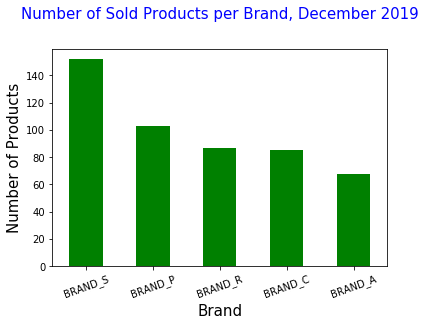

In [2]:
import pandas as pd
import datetime 
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv']= dataset['item_price']*dataset['quantity']

#top 5 Brand
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
             .sum()
             .reset_index()
             .sort_values(by='quantity', ascending=False)
             .head(5))

top_province = (dataset[dataset['order_month']=='2019-12'].groupby('province')['quantity']
             .sum()
             .reset_index()
             .sort_values(by='quantity', ascending=False)
             .head(5))
top_gmv=(dataset[dataset['order_month']=='2019-12'].groupby('brand')['gmv']
             .sum()
             .reset_index()
             .sort_values(by='gmv', ascending=False)
             .head(5))

#dataframe Baru untuk Top 5 Brand
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]
print(top_brands)

dataset_top5province_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['province'].isin(top_province['province'].to_list()))]
print(top_province)

dataset_top5gmv_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_gmv['brand'].to_list()))]
print(top_gmv)

plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=20)
plt.show()

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315
      province  quantity
2  DKI Jakarta      6157
3   Jawa Barat      2323
4  Jawa Tengah      1326
5   Jawa Timur      1136
6   Yogyakarta      1060
     brand         gmv
7  BRAND_R  1358124000
8  BRAND_S  1289261000
6  BRAND_P  1008256000
4  BRAND_J   798862000
2  BRAND_C   756636000


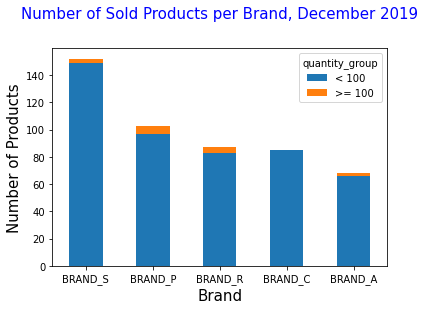

In [6]:
import pandas as pd
import datetime 
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv']= dataset['item_price']*dataset['quantity']

#top 5 Brand
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
             .sum()
             .reset_index()
             .sort_values(by='quantity', ascending=False)
             .head(5))

top_province = (dataset[dataset['order_month']=='2019-12'].groupby('province')['quantity']
             .sum()
             .reset_index()
             .sort_values(by='quantity', ascending=False)
             .head(5))
top_gmv=(dataset[dataset['order_month']=='2019-12'].groupby('brand')['gmv']
             .sum()
             .reset_index()
             .sort_values(by='gmv', ascending=False)
             .head(5))

#dataframe Baru untuk Top 5 Brand
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]
print(top_brands)

dataset_top5province_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['province'].isin(top_province['province'].to_list()))]
print(top_province)

dataset_top5gmv_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_gmv['brand'].to_list()))]
print(top_gmv)

#membuat dataframe baru, untuk agregat jumlah quantity terjual per product
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand', 'product_id'])['quantity'].sum().reset_index()

#beri kolom baru untuk menandai product yang terjual >= 100 dan <100
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

#membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

#plot stacked barchart
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315
      province  quantity
2  DKI Jakarta      6157
3   Jawa Barat      2323
4  Jawa Tengah      1326
5   Jawa Timur      1136
6   Yogyakarta      1060
     brand         gmv
7  BRAND_R  1358124000
8  BRAND_S  1289261000
6  BRAND_P  1008256000
4  BRAND_J   798862000
2  BRAND_C   756636000


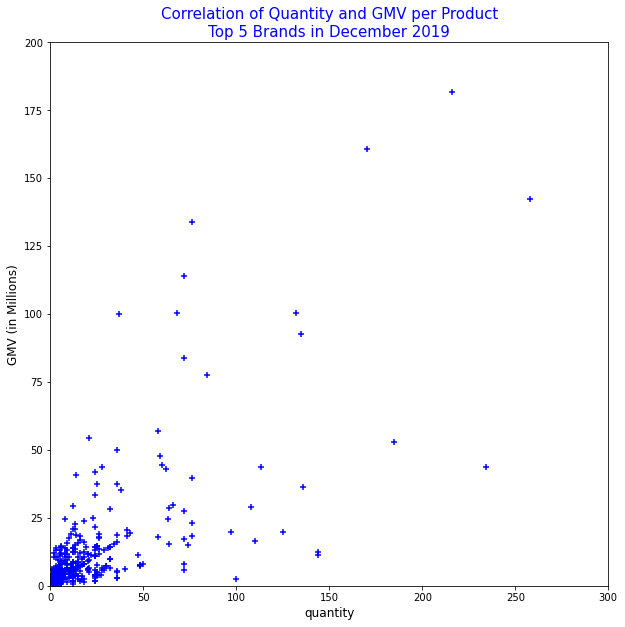

In [3]:
import pandas as pd
import datetime 
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv']= dataset['item_price']*dataset['quantity']

#top 5 Brand
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
             .sum()
             .reset_index()
             .sort_values(by='quantity', ascending=False)
             .head(5))

top_province = (dataset[dataset['order_month']=='2019-12'].groupby('province')['quantity']
             .sum()
             .reset_index()
             .sort_values(by='quantity', ascending=False)
             .head(5))
top_gmv=(dataset[dataset['order_month']=='2019-12'].groupby('brand')['gmv']
             .sum()
             .reset_index()
             .sort_values(by='gmv', ascending=False)
             .head(5))

#dataframe Baru untuk Top 5 Brand
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]
print(top_brands)

dataset_top5province_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['province'].isin(top_province['province'].to_list()))]
print(top_province)

dataset_top5gmv_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_gmv['brand'].to_list()))]
print(top_gmv)


#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()


#scatter plot
plt.figure(figsize=(10,10))
plt.scatter(data_per_product_top5brand_dec['quantity'], data_per_product_top5brand_dec['gmv'], marker='+', color='blue')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()